<a href="https://colab.research.google.com/github/Anum79/AI-Q2-learning-resources/blob/master/img_transformation_basic1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import cv2
image = cv2.imread('/content/anum1.jpeg')

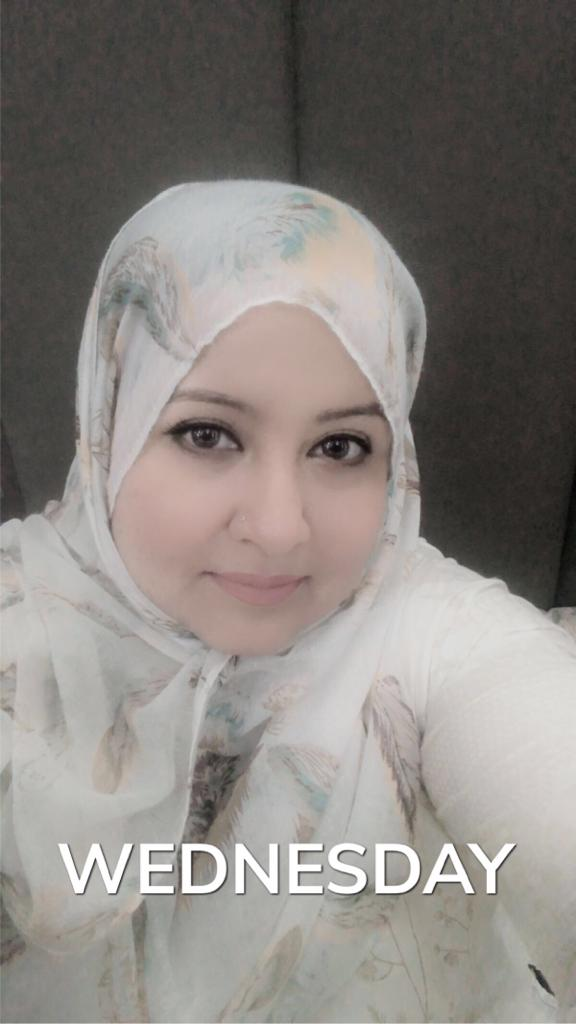

-1

In [13]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)
cv2.waitKey()

In [14]:
print(image.shape)
print(image.size)
print(type(image))

(1024, 576, 3)
1769472
<class 'numpy.ndarray'>


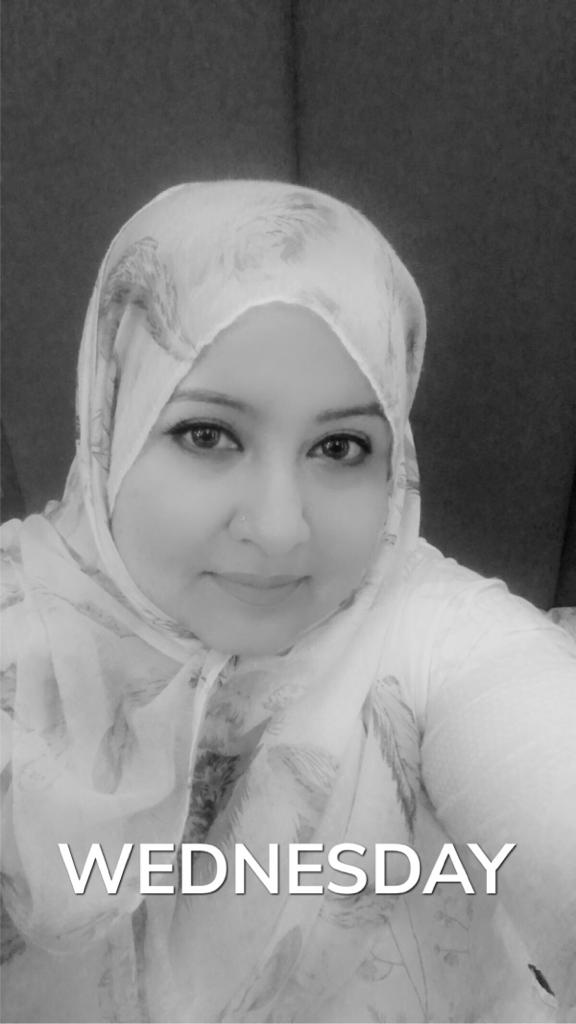

In [15]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

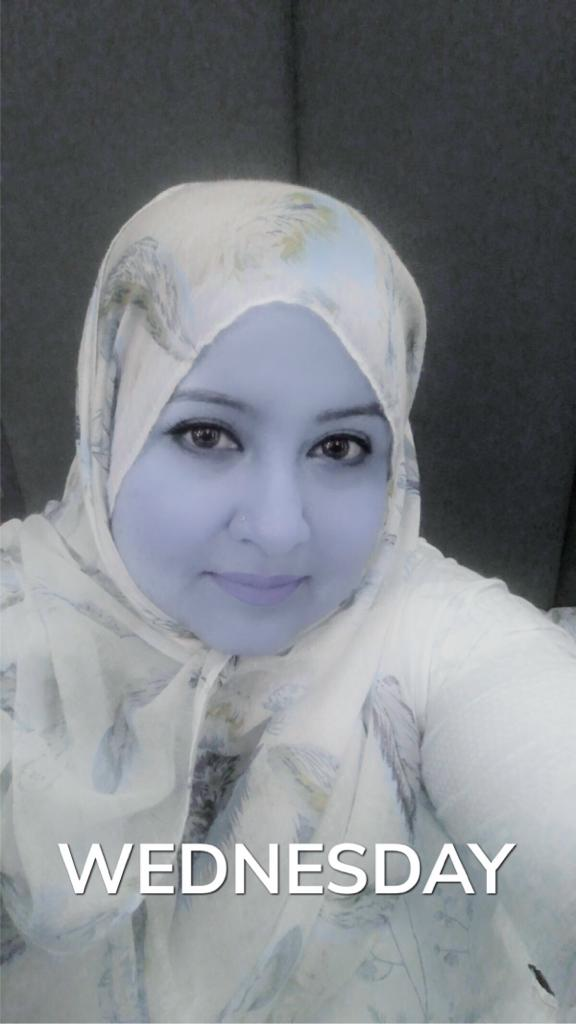

In [16]:
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [18]:
cv2.imwrite('/content/anum1.jpeg', rgb, [cv2.IMWRITE_PNG_COMPRESSION])

True

In [20]:
import numpy as np

In [21]:
num_rows, num_cols = image.shape[:2]
translation_matrix = np.float32([ [1,0,70], [0,1,110] ])
img_translation = cv2.warpAffine(image, translation_matrix, (num_cols, num_rows), cv2.INTER_LINEAR)

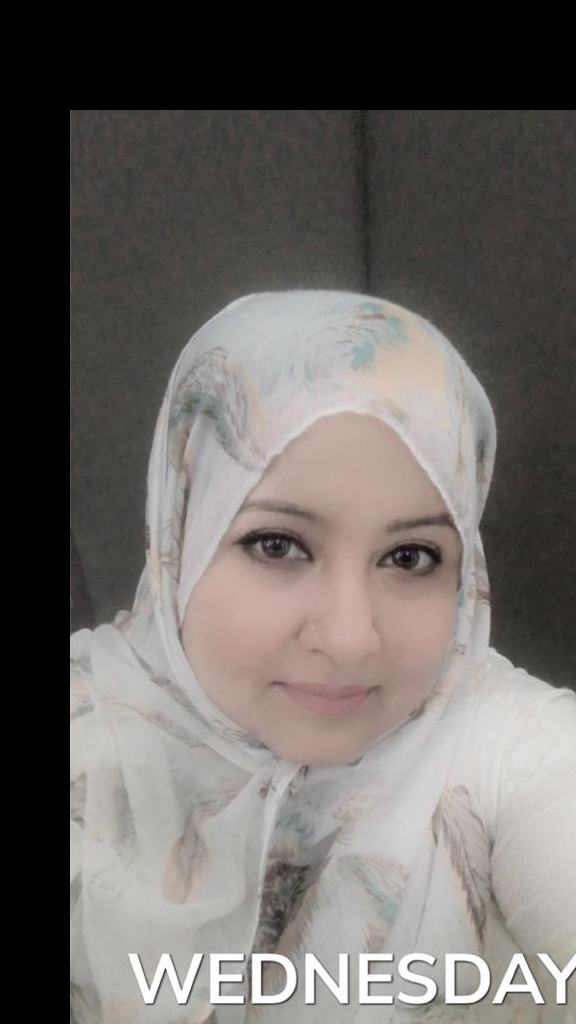

In [22]:
cv2_imshow(img_translation)

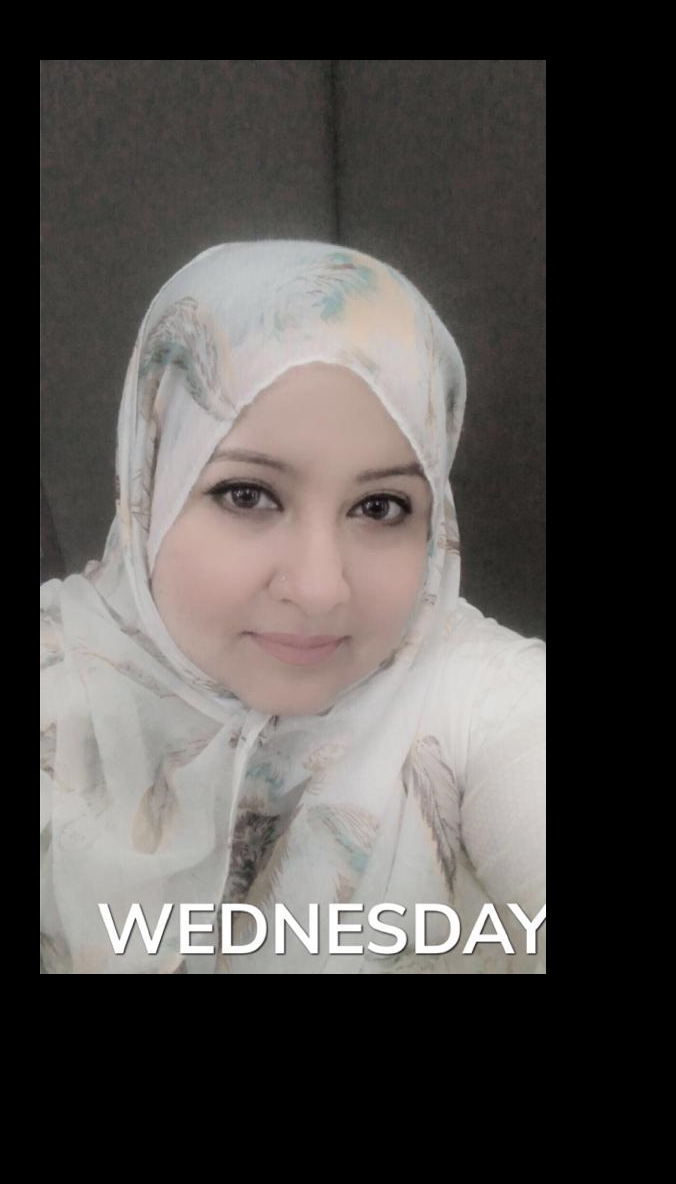

In [23]:
translation_matrix = np.float32([ [1,0,-30], [0,1,-50] ])
img_translation = cv2.warpAffine(img_translation, translation_matrix, (num_cols + 70 + 30, num_rows + 110 + 50))
cv2_imshow(img_translation)

In [26]:
img_rotation = cv2.warpAffine(image,
cv2.getRotationMatrix2D((num_cols/2,
num_rows/2), 30, 0.6), (num_cols, num_rows))
                              

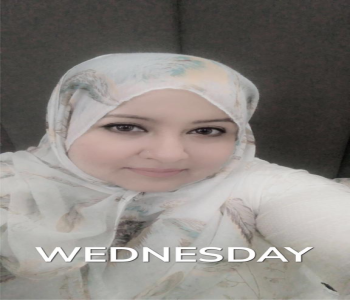

In [27]:
img_shrinked = cv2.resize(image,(350, 300), interpolation = cv2.INTER_AREA)
cv2_imshow(img_shrinked)

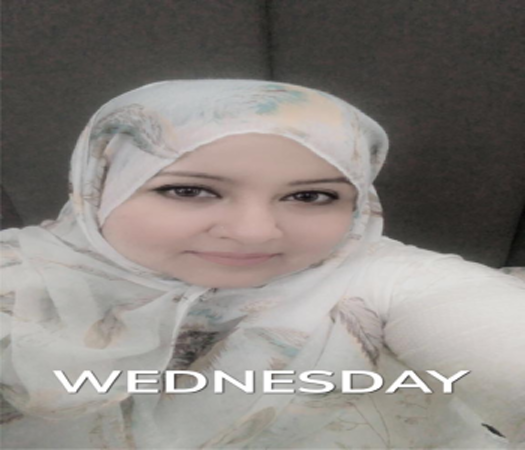

In [28]:
img_enlarged = cv2.resize(img_shrinked,None,fx=1.5, fy=1.5, interpolation = cv2.INTER_CUBIC)
cv2_imshow(img_enlarged)

In [29]:
src_points = np.float32([[0,0], [num_cols-1,0], [0,num_rows-1]])
dst_points = np.float32([[0,0], [int(0.6*(num_cols-1)),0], [int(0.4*(num_cols-1)),num_rows-1]])
matrix = cv2.getAffineTransform(src_points, dst_points)
img_afftran = cv2.warpAffine(image, matrix, (num_cols,num_rows))

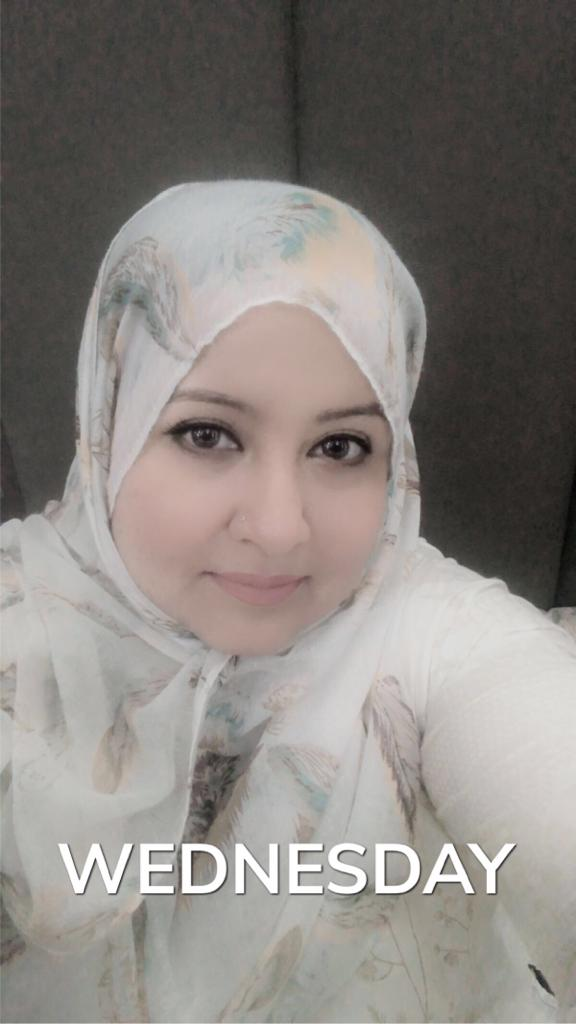

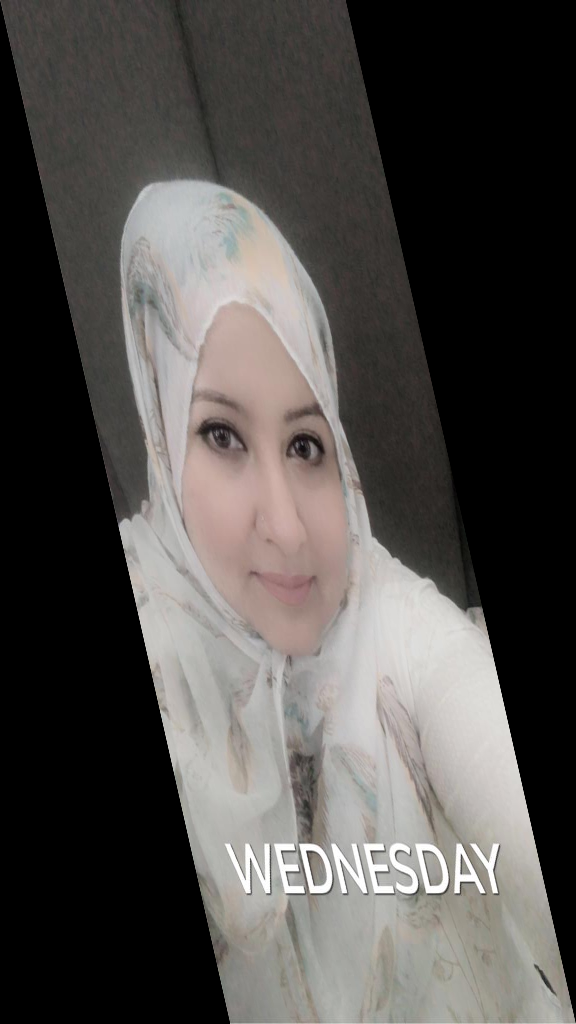

In [30]:
cv2_imshow(image)
cv2_imshow(img_afftran)

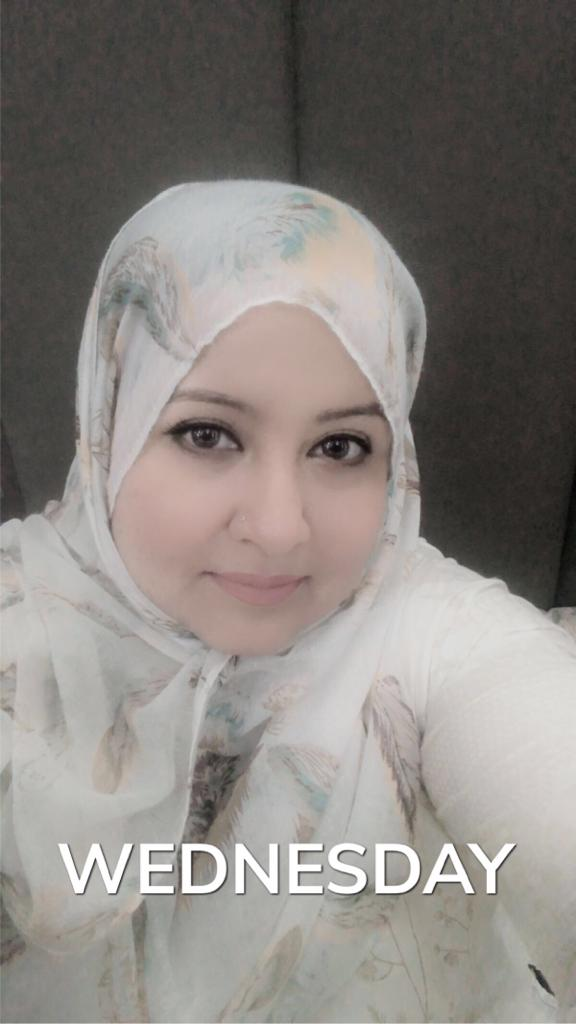

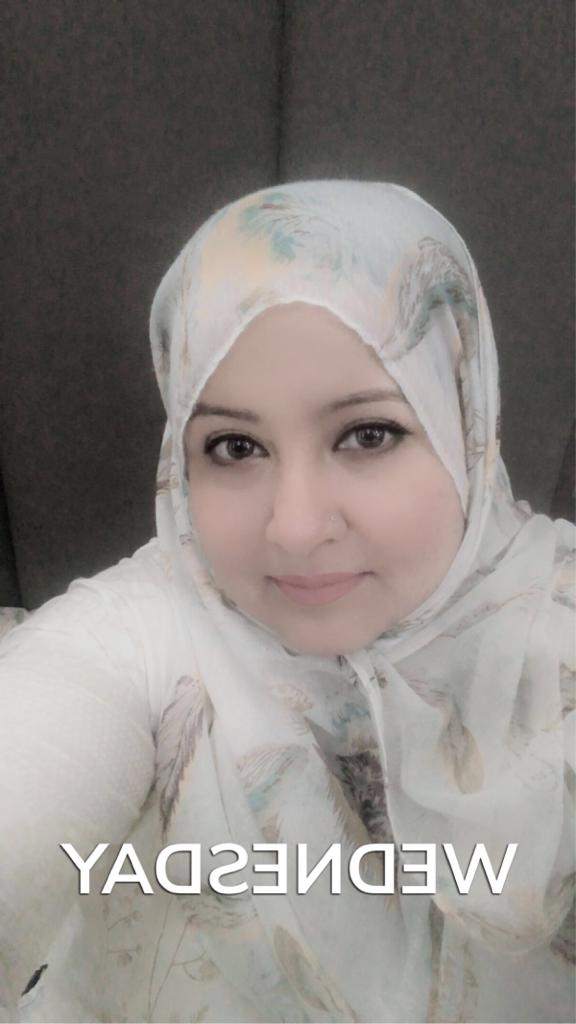

In [31]:
src_points = np.float32([[0,0], [num_cols-1,0], [0,num_rows-1]])
dst_points = np.float32([[num_cols-1,0], [0,0], [num_cols-1,num_rows-1]])
matrix = cv2.getAffineTransform(src_points, dst_points)
img_afftran = cv2.warpAffine(image, matrix, (num_cols,num_rows))
cv2_imshow(image)
cv2_imshow(img_afftran)

In [32]:
src_points = np.float32([[0,0], [num_cols-1,0], [0,num_rows-1], [num_cols-1,num_rows-1]])
dst_points = np.float32([[0,0], [num_cols-1,0], [int(0.33*num_cols),num_rows-1], [int(0.66*num_cols),num_rows-1]])
projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
img_protran = cv2.warpPerspective(image, projective_matrix, (num_cols,num_rows))

In [33]:
import math
rows, cols = image.shape[:2]

# Vertical wave 

img_output = np.zeros(img_afftran.shape, dtype=image.dtype) 
for i in range(rows): 
    for j in range(cols): 
        offset_x = int(25.0 * math.sin(2 * 3.14 * i / 180)) 
        offset_y = 0 
        if j+offset_x < rows: 
            img_output[i,j] = img_afftran[i,(j+offset_x)%cols] 
        else: 
            img_output[i,j] = 0

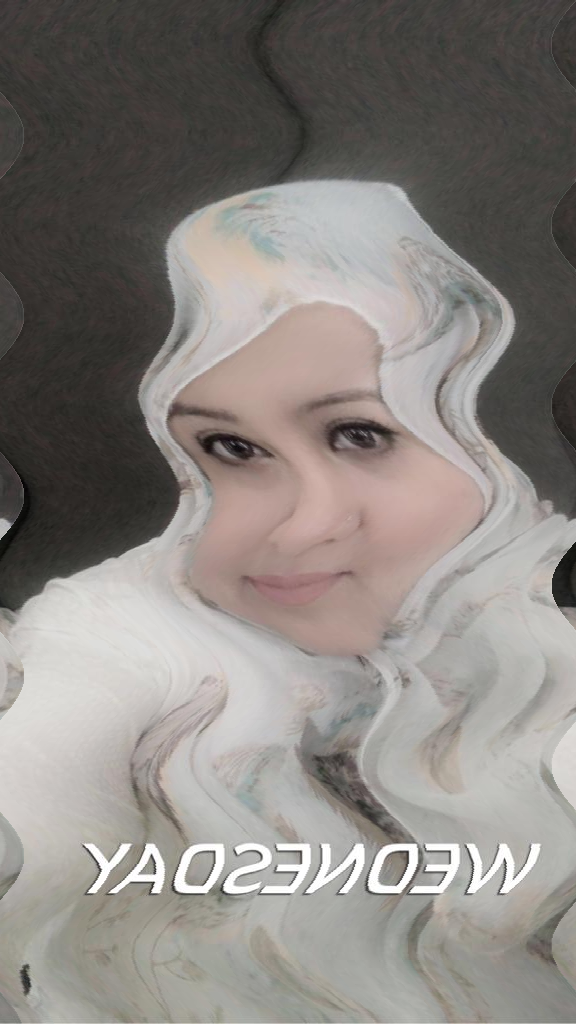

In [34]:
cv2_imshow(img_output)